In [1]:
import generate_masterdf as gm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from generate_plots import subject_wise_error_plot, quick_visualization, distribution_plots
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 4)

We have 1 subjects so far: ['sub16']

Creating a new dataframe.
Running subj = 16, day = 1
Trial-count: pro = 200, anti = 200

Running subj = 16, day = 3
Trial-count: pro = 200, anti = 200

Running subj = 16, day = 2
Trial-count: pro = 200, anti = 200



In [2]:
df = gm.master_df
print('Dataframe description')
df.info()

Dataframe description
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 399
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subjID                1200 non-null   int64  
 1   day                   1200 non-null   int64  
 2   tnum                  1200 non-null   uint8  
 3   rnum                  1200 non-null   uint8  
 4   istms                 1200 non-null   uint8  
 5   ispro                 1200 non-null   uint8  
 6   instimVF              1200 non-null   uint8  
 7   breakfix              1200 non-null   uint8  
 8   no_prim_sacc          1200 non-null   uint8  
 9   small_sacc            1200 non-null   uint8  
 10  large_error           1200 non-null   uint8  
 11  rejtrials             1200 non-null   uint8  
 12  TarX                  1200 non-null   float64
 13  TarY                  1200 non-null   float64
 14  isaccX                800 non-null    float64
 15  

In [3]:
df.describe()

,subjID,day,tnum,rnum,istms,ispro,instimVF,breakfix,no_prim_sacc,small_sacc,large_error,rejtrials,TarX,TarY,isaccX,isaccY,fsaccX,fsaccY,isacc_err,fsacc_err,isacc_theta_err,fsacc_theta_err,corrected_theta_err,isacc_radius_err,fsacc_radius_err,corrected_radius_err,nsacc,calib_err,isacc_rt,fsacc_rt,isacc_peakvel,fsacc_peakvel
count,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,6000.0,6000.0,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,5563.0000,5600.0000,5563.0000,5600.0000,5563.0000,5563.0000,5600.0000,5563.0000,6000.0000,5991.0000,5563.0000,5600.0000,5563.0000,5600.0000
mean,6.6000,2.0000,20.5000,5.5000,0.6667,0.5,0.5,0.0793,0.0667,0.0062,0.0253,0.0920,2.2331,-2.7524,3.2729,-3.8994,3.7002,-5.3428,2.1510,1.7739,0.0350,0.0242,-0.0045,-0.3767,-0.3290,0.0973,1.5233,1.5869,0.3464,0.4790,317.5115,207.1037
std,4.8419,0.8166,11.5444,2.8725,0.4714,0.5,0.5,0.2703,0.2495,0.0783,0.1571,0.2891,14.2735,2.1087,13.8988,3.0127,13.9884,8.3950,3.6025,3.6089,0.4252,0.4156,0.1367,2.2273,1.8934,1.7317,0.8884,3.6670,0.1457,0.1894,101.2265,140.6483
min,1.0000,1.0000,1.0000,1.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,-17.3950,-5.3671,-18.4887,-7.8345,-17.3365,-35.0947,0.0056,0.0056,-2.8856,-2.8608,-2.8873,-14.4934,-16.9893,-18.7994,0.0000,0.0065,0.0040,0.0070,32.0584,31.4094
25%,3.0000,1.0000,10.7500,3.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,-14.5050,-4.2937,-13.9578,-6.5882,-13.9578,-5.0897,0.8010,0.6097,-0.0289,-0.0259,-0.0048,-1.2161,-0.9695,-0.1171,1.0000,0.3986,0.2560,0.2990,249.3787,77.3161
50%,6.0000,2.0000,20.5000,5.5000,1.0000,0.5,0.5,0.0000,0.0000,0.0000,0.0000,0.0000,12.5233,-3.2478,11.2673,-4.3814,12.5236,-4.3814,1.4015,1.0916,0.0073,0.0038,0.0000,-0.1133,-0.1222,0.0000,1.0000,0.6322,0.2930,0.4690,304.0224,175.8989
75%,8.0000,3.0000,30.2500,8.0000,1.0000,1.0,1.0,0.0000,0.0000,0.0000,0.0000,0.0000,14.2023,-1.2386,14.3116,-0.8811,14.6117,-0.8851,2.2352,1.7177,0.0439,0.0352,0.0000,0.8791,0.5887,0.0000,2.0000,0.9744,0.3790,0.6190,376.8618,310.5027
max,15.0000,3.0000,40.0000,10.0000,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,15.8537,3.1652,18.7097,3.0808,18.0608,3.0349,38.9050,36.6454,3.1393,3.1377,3.1394,11.6122,22.9536,27.9670,14.0000,35.5759,1.0010,1.0010,599.7850,570.1034


In [4]:
df.describe(include=object)

,trial_type,TMS_condition
count,6000,6000
unique,4,3
top,pro_intoVF,TMS intoVF
freq,1500,2000


In [5]:
n_rows_original = len(df)
# Filter out entries with 'rejtrials' == 1
df_filtered = df[(df['rejtrials'] != 1) & (df['fsacc_theta_err'] < 2) & (df['fsacc_theta_err'] > -2)].copy()
df_filtered = df_filtered.dropna()
n_rows_filtered = len(df_filtered)
print(f"Original = {n_rows_original}, after filtering = {n_rows_filtered} trials.")
print()
print('Dataframe description after filtering')
df_filtered.info()

Original = 6000, after filtering = 5371 trials.

Dataframe description after filtering
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5371 entries, 0 to 5999
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subjID                5371 non-null   int64  
 1   day                   5371 non-null   int64  
 2   tnum                  5371 non-null   int64  
 3   rnum                  5371 non-null   int64  
 4   istms                 5371 non-null   int64  
 5   ispro                 5371 non-null   int64  
 6   instimVF              5371 non-null   int64  
 7   breakfix              5371 non-null   int64  
 8   no_prim_sacc          5371 non-null   int64  
 9   small_sacc            5371 non-null   int64  
 10  large_error           5371 non-null   int64  
 11  rejtrials             5371 non-null   int64  
 12  TarX                  5371 non-null   float64
 13  TarY                  5371 non-null 

In [6]:
df_filtered.describe()

,subjID,day,tnum,rnum,istms,ispro,instimVF,breakfix,no_prim_sacc,small_sacc,large_error,rejtrials,TarX,TarY,isaccX,isaccY,fsaccX,fsaccY,isacc_err,fsacc_err,isacc_theta_err,fsacc_theta_err,corrected_theta_err,isacc_radius_err,fsacc_radius_err,corrected_radius_err,nsacc,calib_err,isacc_rt,fsacc_rt,isacc_peakvel,fsacc_peakvel
count,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0,5371.0,5371.0,5371.0,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000,5371.0000
mean,6.4690,2.0168,20.4433,5.4971,0.6589,0.4954,0.4954,0.0564,0.0,0.0,0.0,0.0,2.4859,-2.6006,3.5051,-3.8006,3.9004,-5.4410,1.6355,1.2672,0.0142,0.0038,-0.0028,-0.2259,-0.1984,0.0274,1.6222,1.3209,0.3449,0.4747,318.6563,207.5306
std,4.9985,0.8120,11.5356,2.8850,0.4741,0.5000,0.5000,0.2307,0.0,0.0,0.0,0.0,14.3223,2.1010,14.0985,3.1000,14.1866,8.5510,1.2358,1.1161,0.1608,0.0687,0.0661,1.7592,1.4072,1.4134,0.7847,2.9579,0.1431,0.1868,100.3421,140.9564
min,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,-17.3950,-5.3671,-18.4887,-7.8345,-17.3365,-35.0947,0.0056,0.0056,-0.5225,-1.5797,-1.2561,-9.5277,-14.0882,-17.9061,1.0000,0.0065,0.0120,0.0240,32.3546,31.4094
25%,3.0000,1.0000,10.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,-14.5050,-4.2662,-13.9578,-6.5882,-13.9578,-5.0897,0.7821,0.5893,-0.0282,-0.0254,-0.0046,-1.1501,-0.9271,-0.1333,1.0000,0.3879,0.2560,0.2985,250.0336,77.9463
50%,6.0000,2.0000,20.0000,5.0000,1.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,12.9087,-3.2478,11.2673,-4.3814,12.5236,-4.3814,1.3666,1.0634,0.0068,0.0034,0.0000,-0.0883,-0.1045,0.0000,1.0000,0.6114,0.2920,0.4620,304.0282,175.8526
75%,8.0000,3.0000,30.0000,8.0000,1.0000,1.0000,1.0000,0.0000,0.0,0.0,0.0,0.0,14.2023,-1.2386,14.3116,-0.8811,14.6117,-0.8851,2.1521,1.6585,0.0416,0.0336,0.0000,0.8927,0.5992,0.0000,2.0000,0.9216,0.3745,0.6125,377.8804,310.4500
max,15.0000,3.0000,40.0000,10.0000,1.0000,1.0000,1.0000,1.0000,0.0,0.0,0.0,0.0,15.8537,3.1652,18.7097,3.0808,18.0608,3.0349,9.9137,30.9722,3.1393,1.3845,3.1345,6.1465,22.9536,27.9670,14.0000,18.1298,1.0010,1.0010,588.4051,570.1034


In [7]:
df_filtered.describe(include=object)

,trial_type,TMS_condition
count,5371,5371
unique,4,3
top,anti_outVF,No TMS
freq,1381,1832


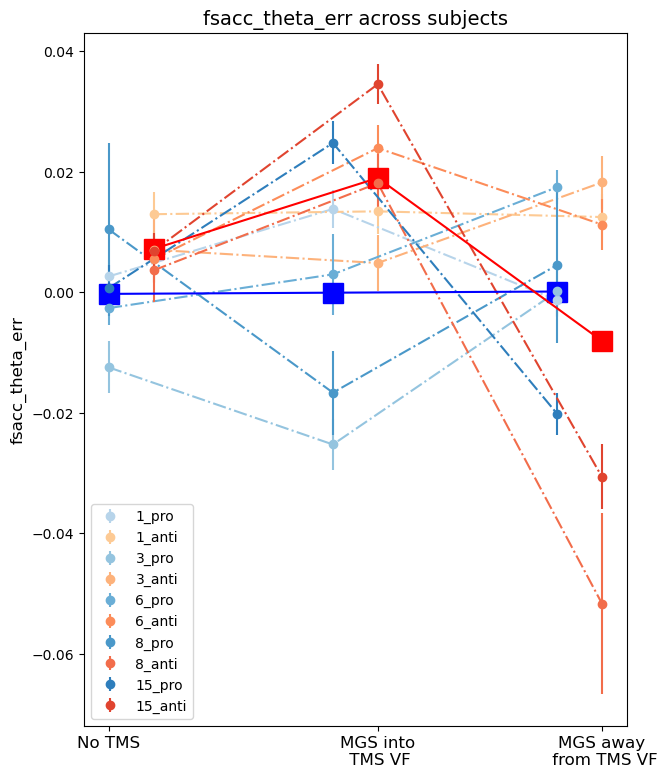

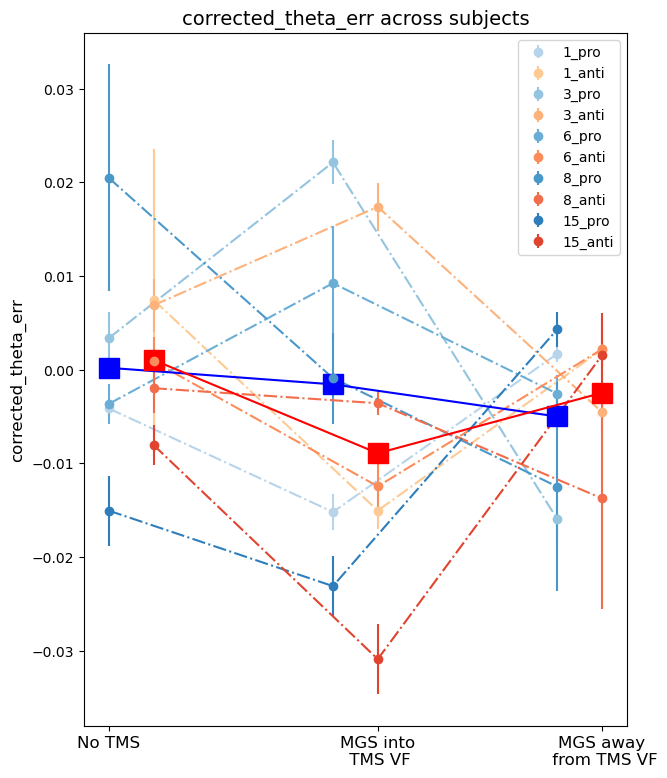

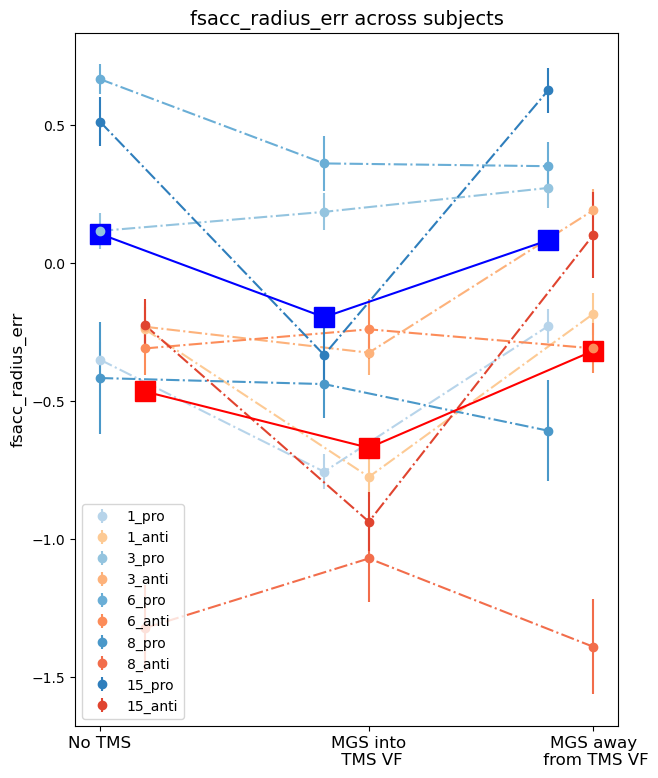

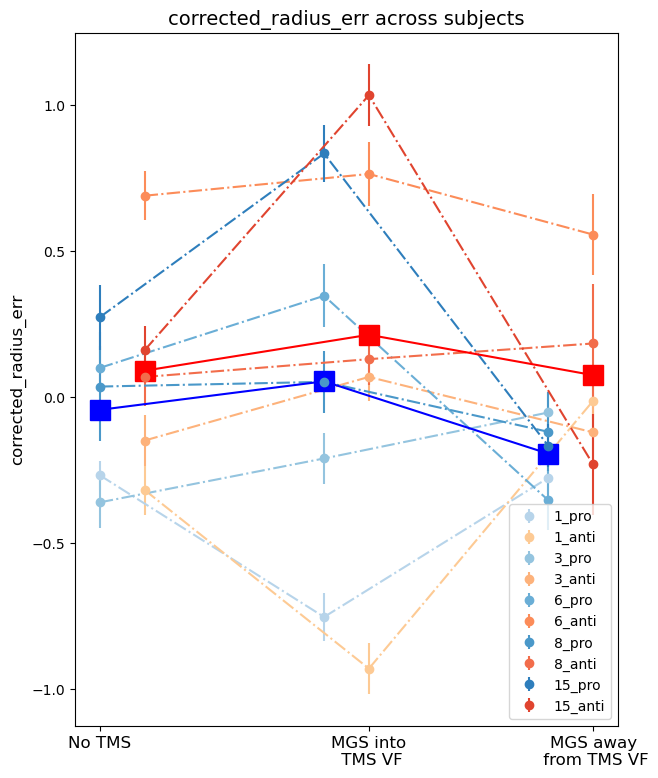

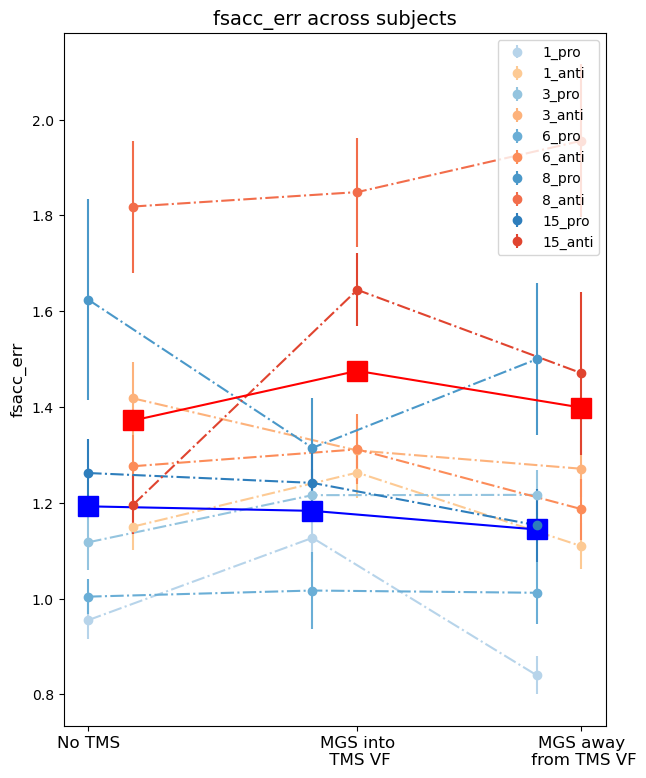

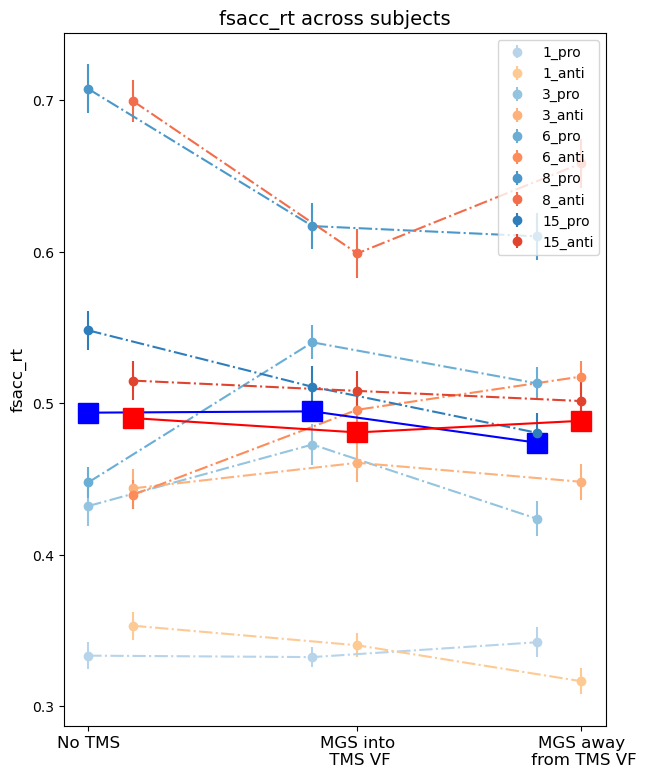

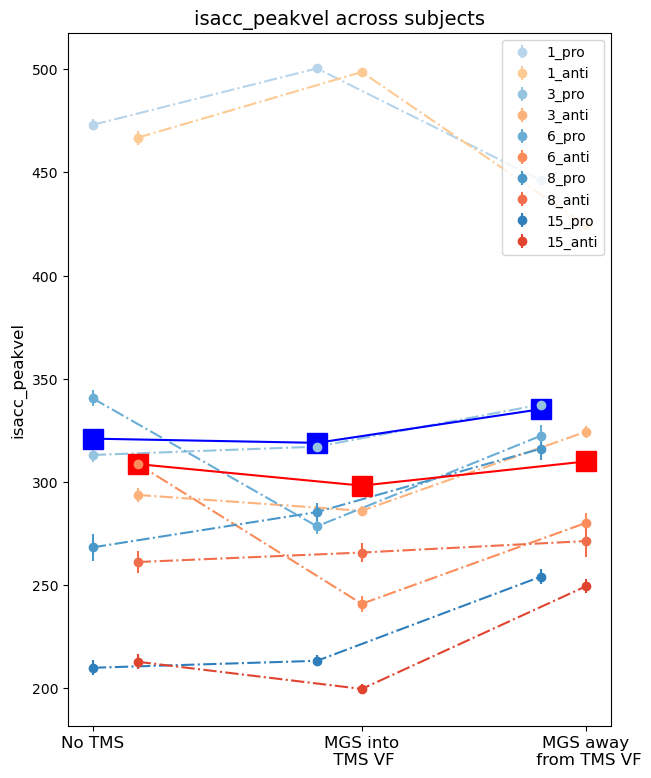

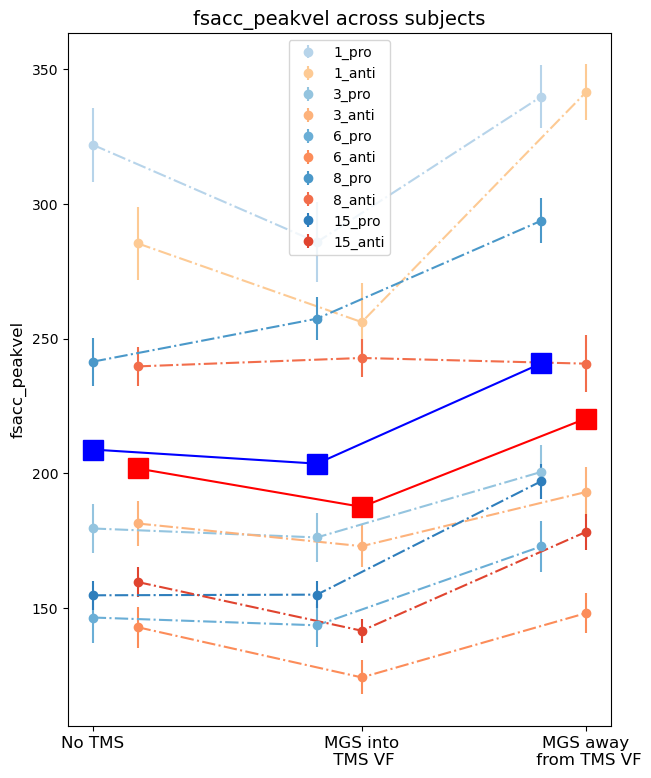

In [8]:
subject_wise_error_plot(df_filtered, 'fsacc_theta_err')
subject_wise_error_plot(df_filtered, 'corrected_theta_err')
subject_wise_error_plot(df_filtered, 'fsacc_radius_err')
subject_wise_error_plot(df_filtered, 'corrected_radius_err')
subject_wise_error_plot(df_filtered, 'fsacc_err')
subject_wise_error_plot(df_filtered, 'fsacc_rt')
subject_wise_error_plot(df_filtered, 'isacc_peakvel')
subject_wise_error_plot(df_filtered, 'fsacc_peakvel')

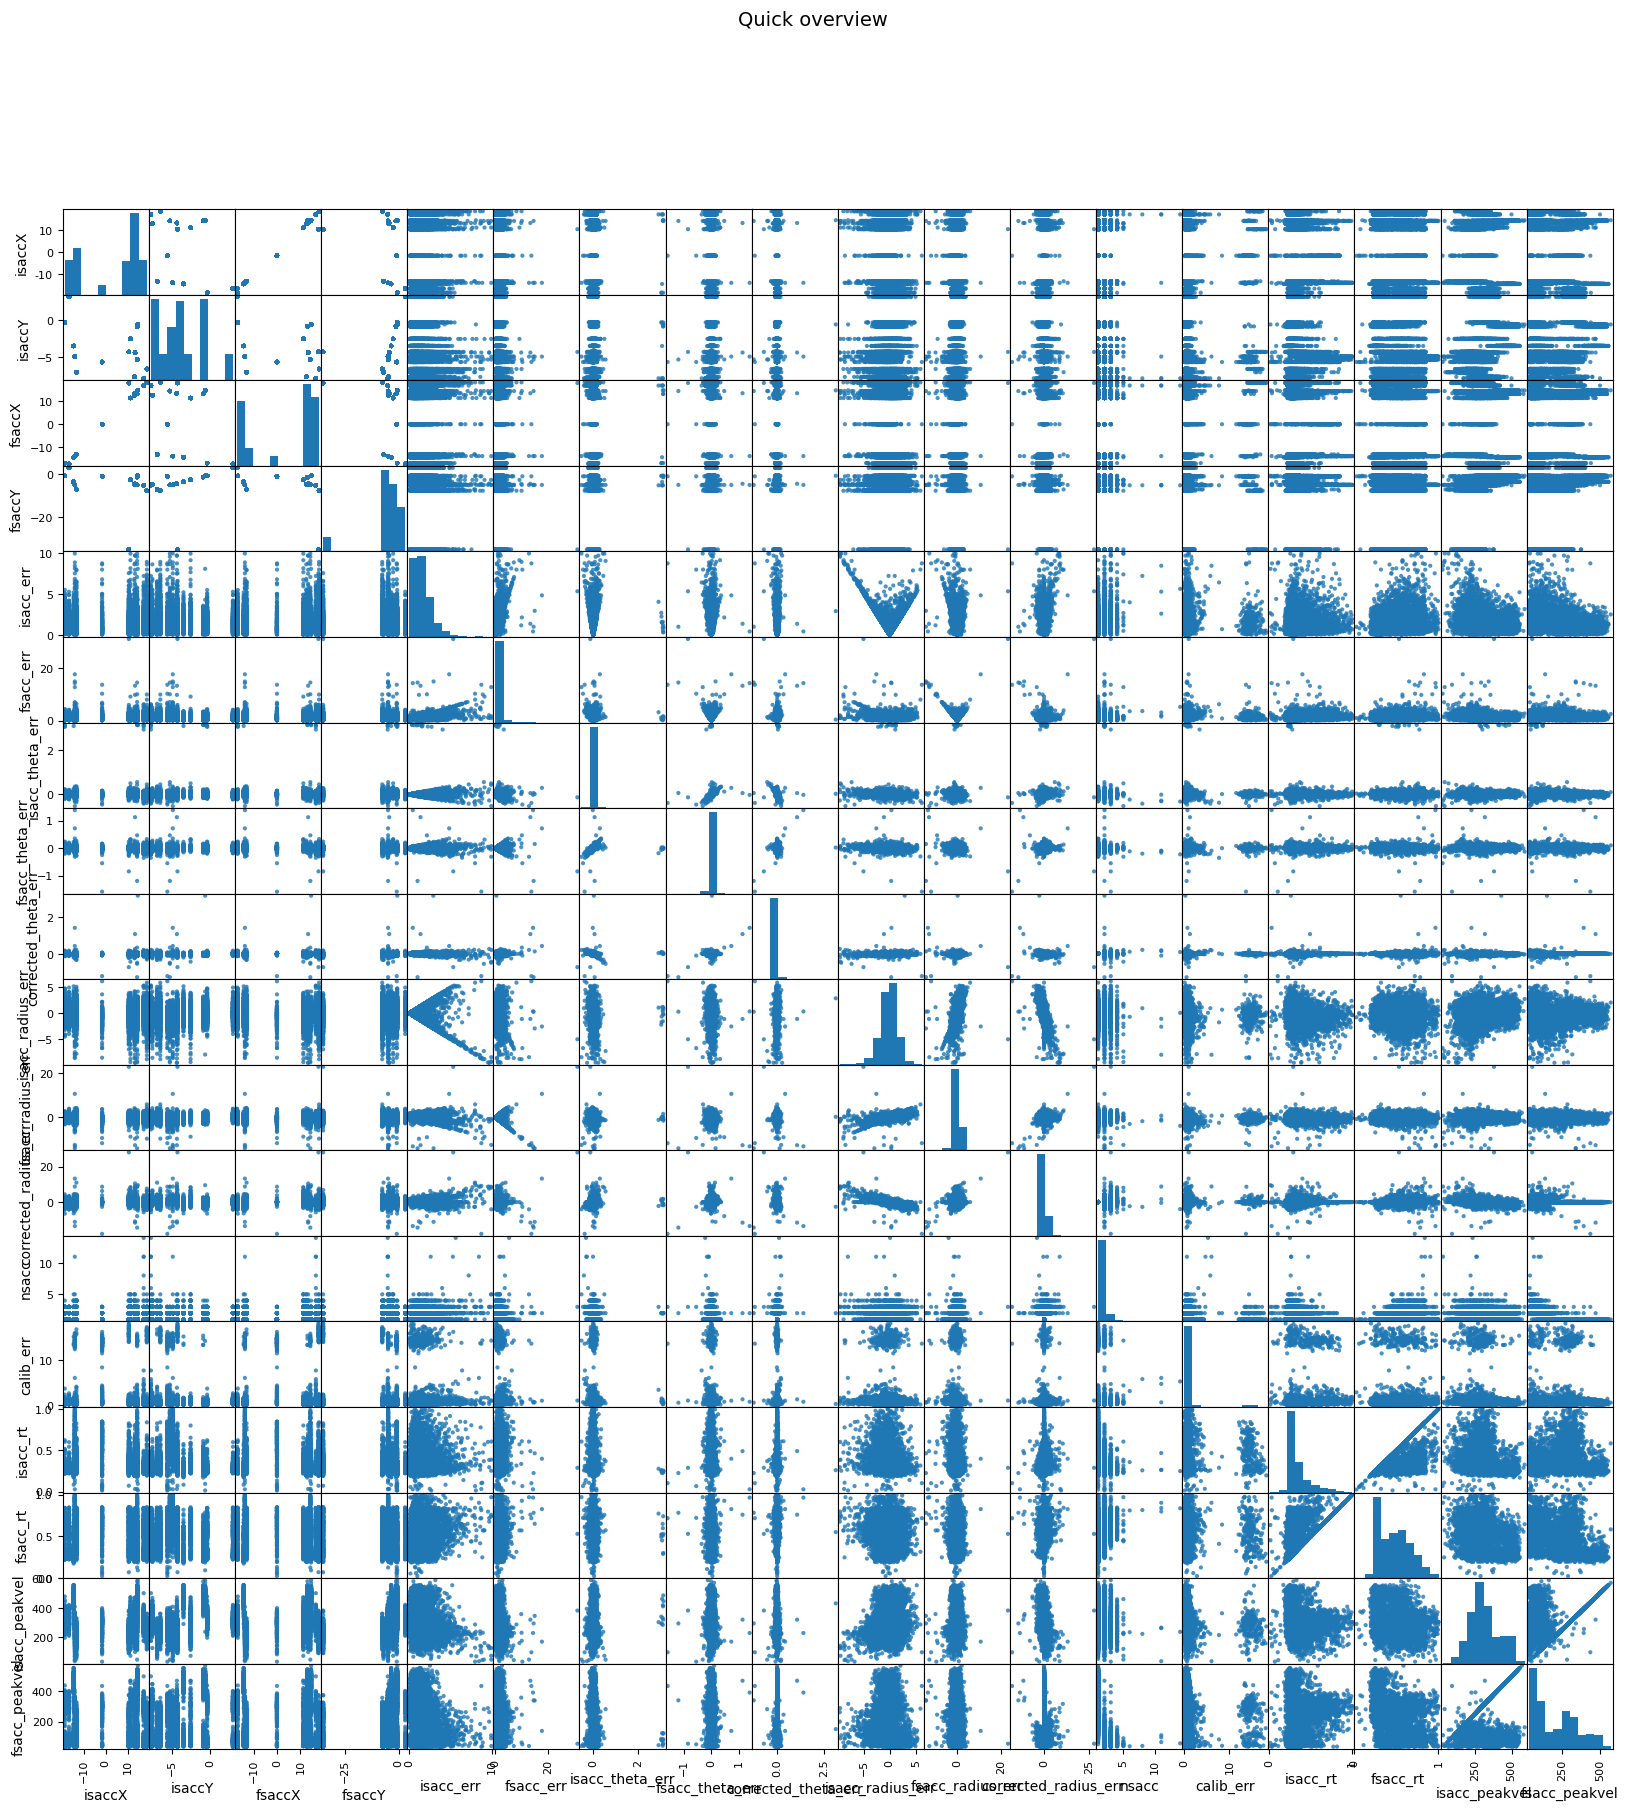

In [9]:
quick_visualization(df_filtered)

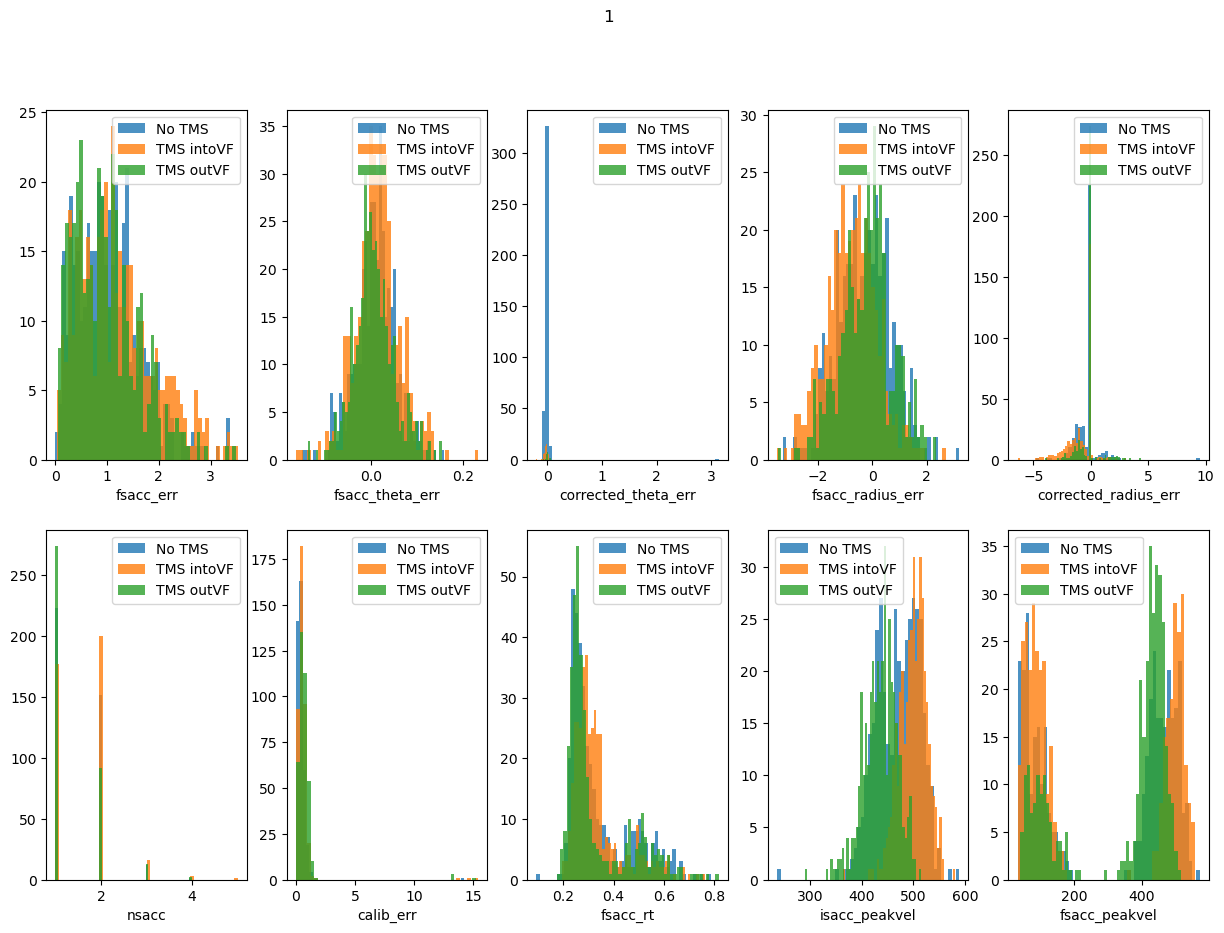

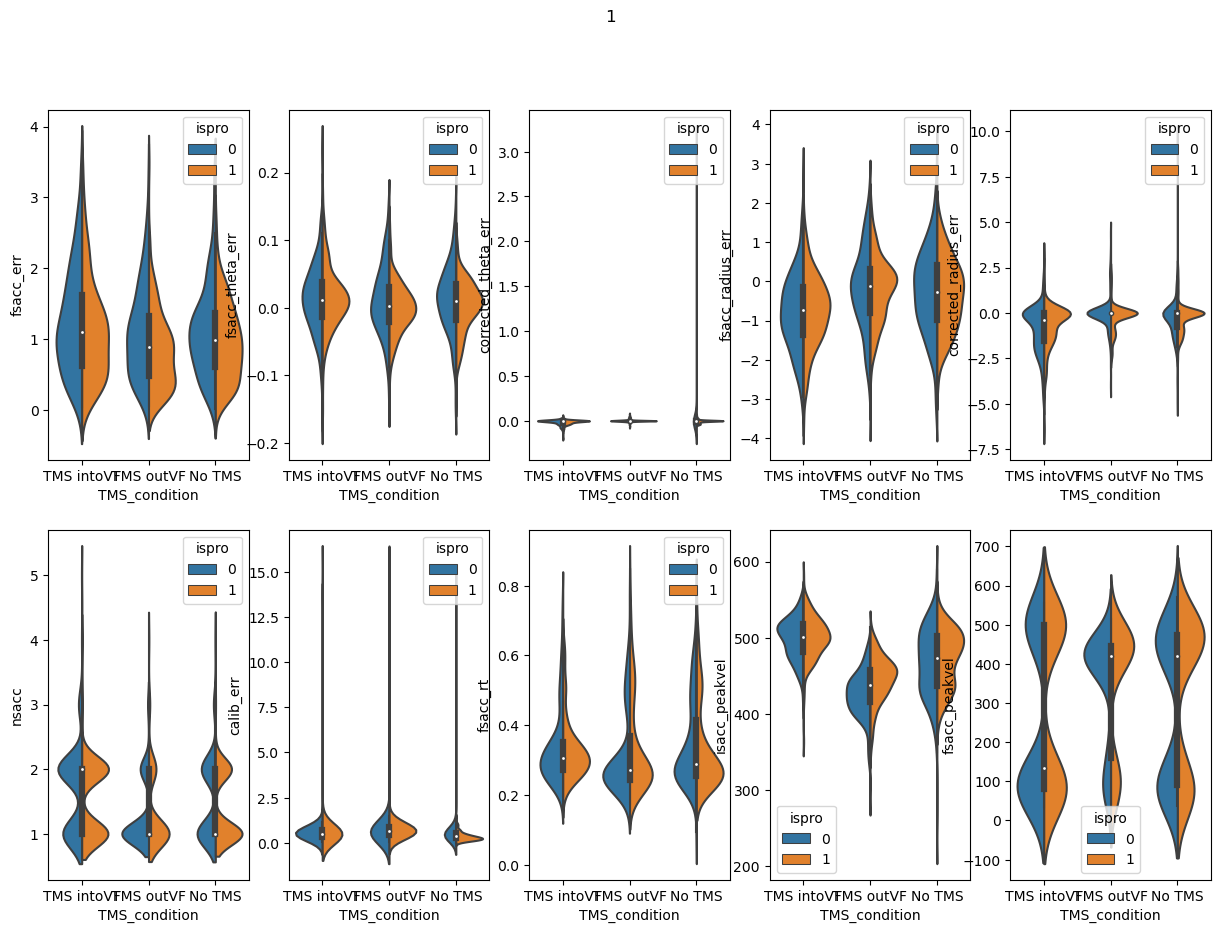

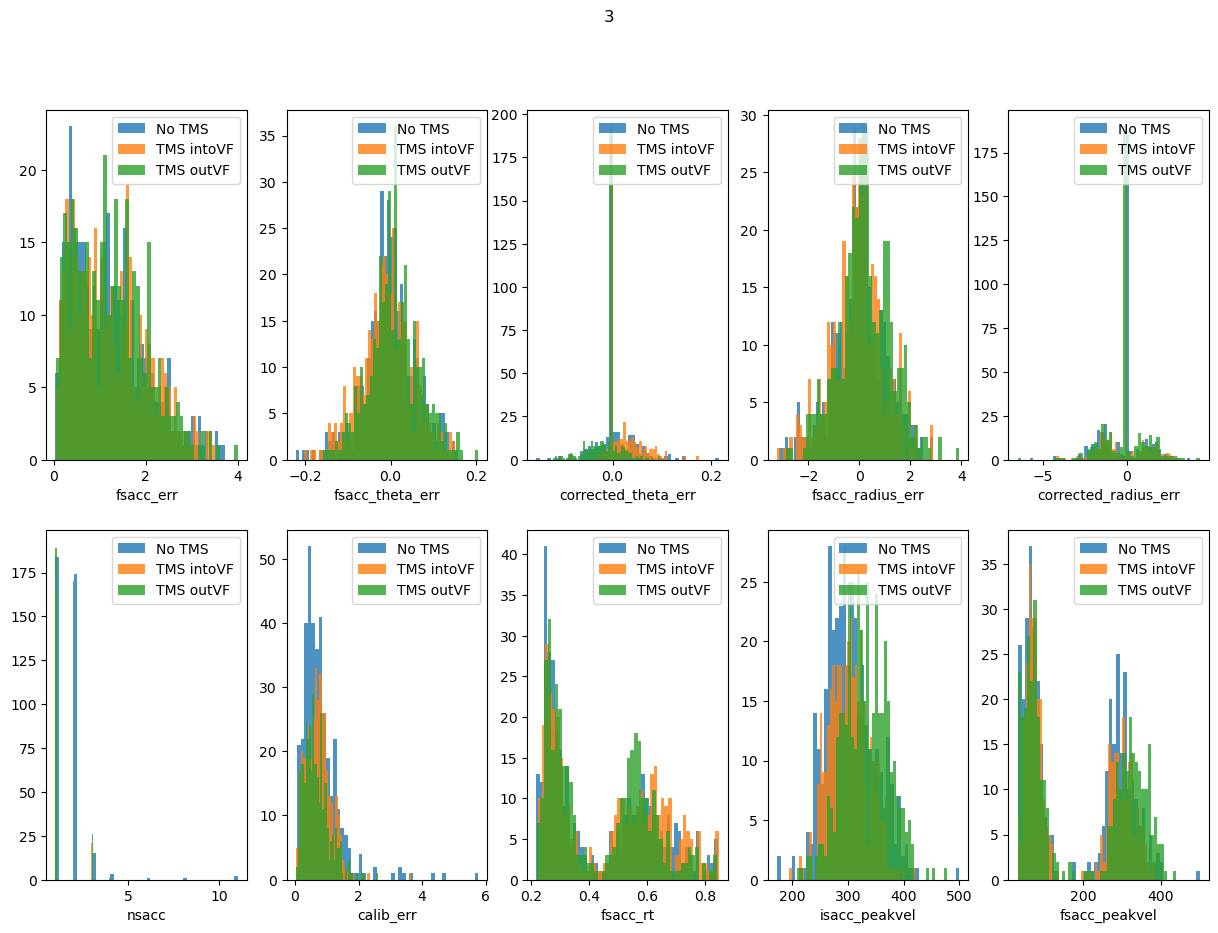

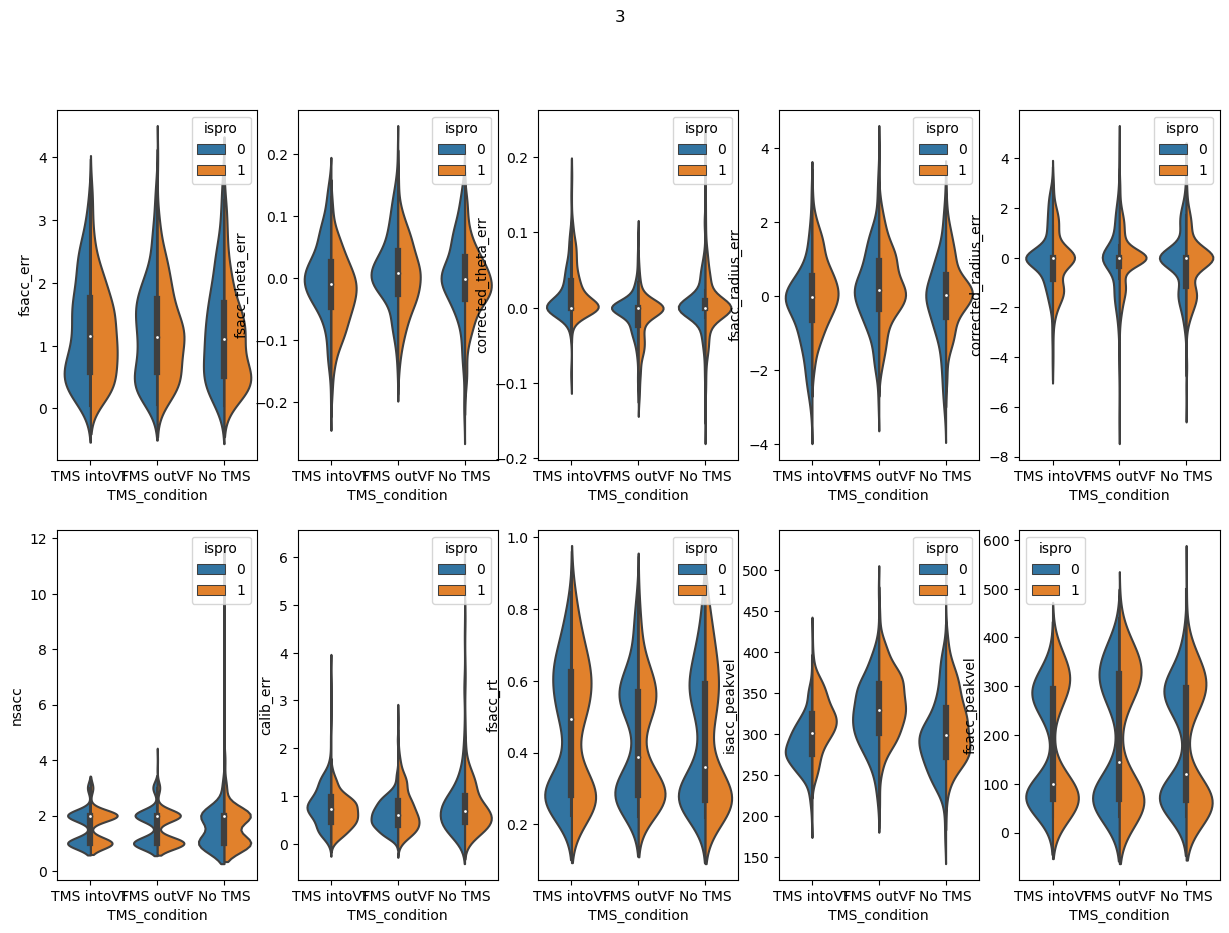

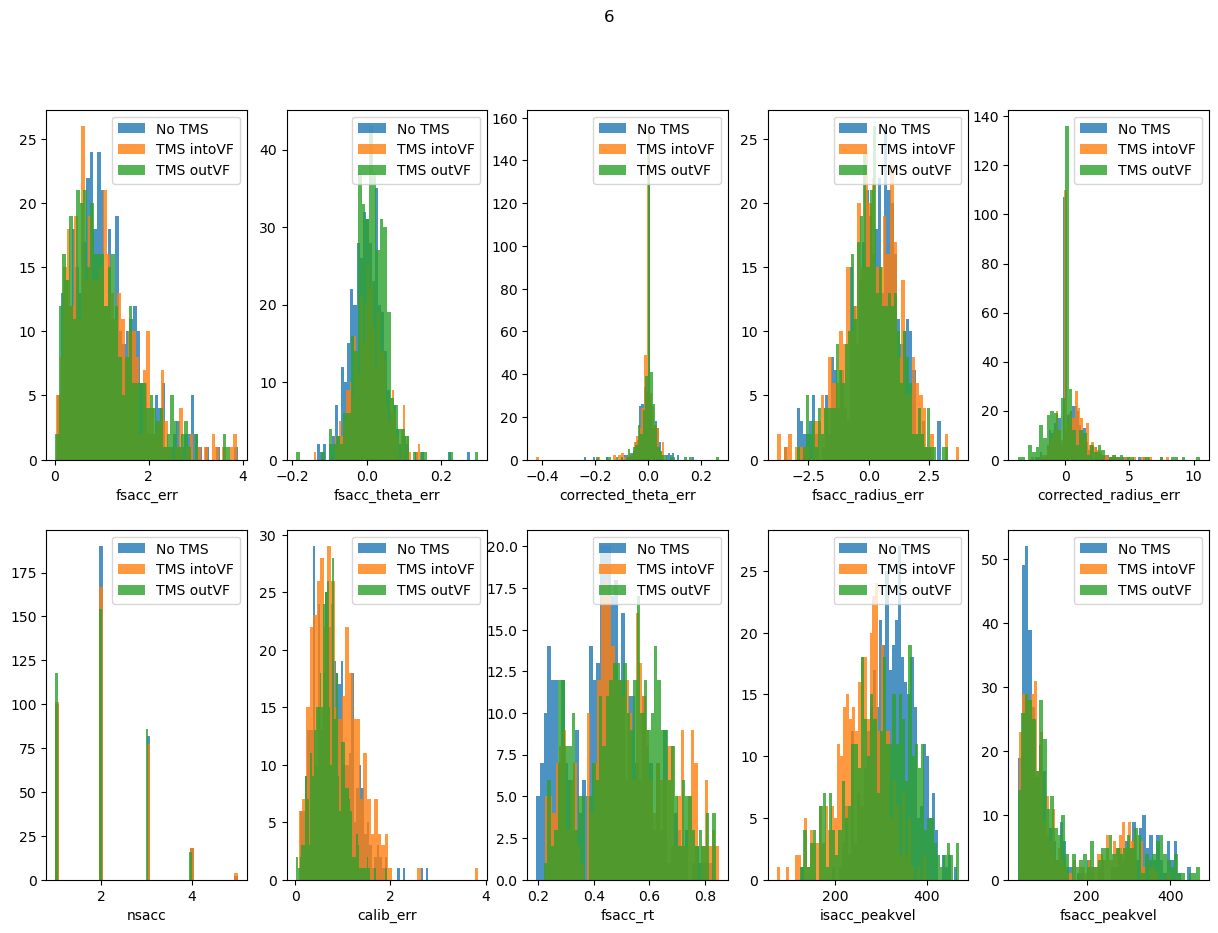

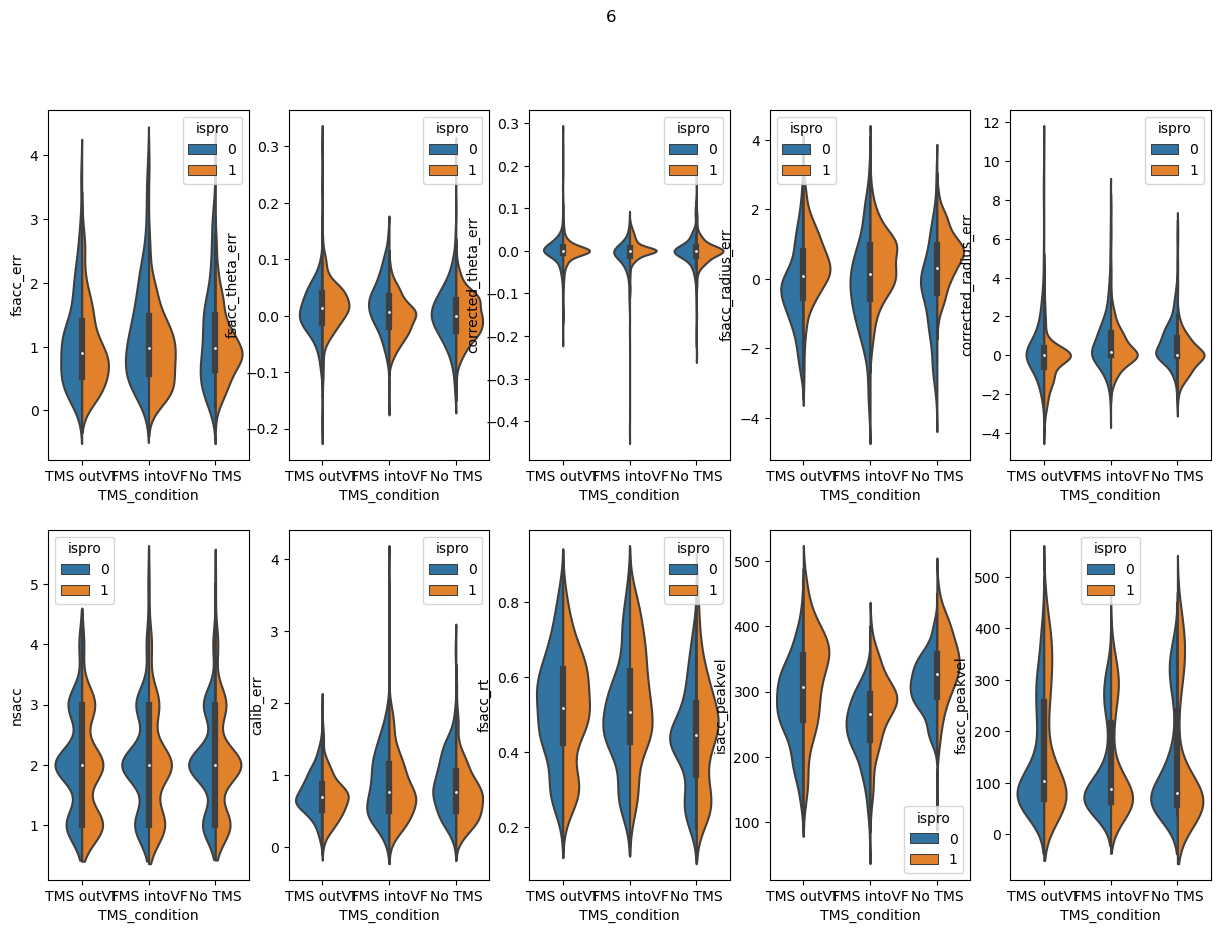

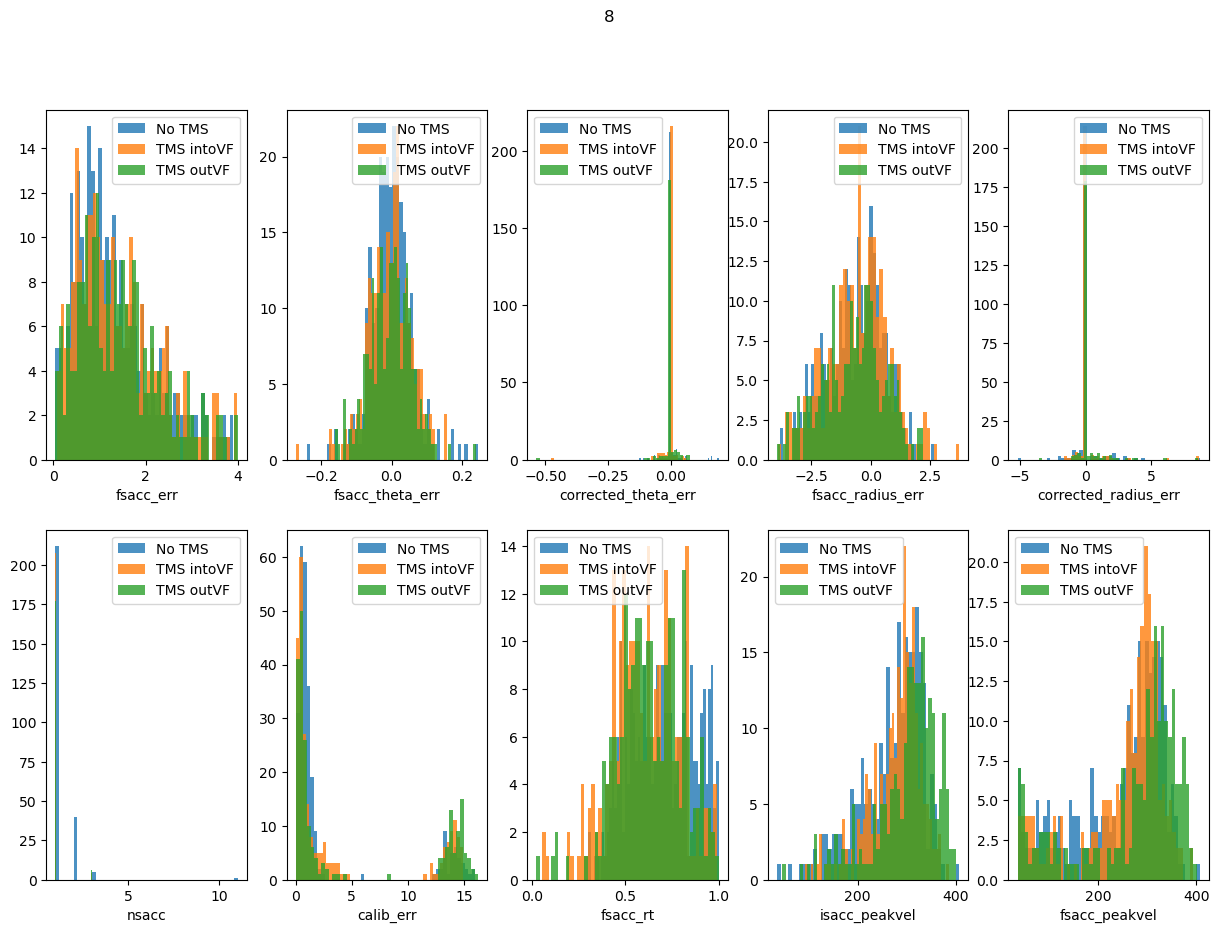

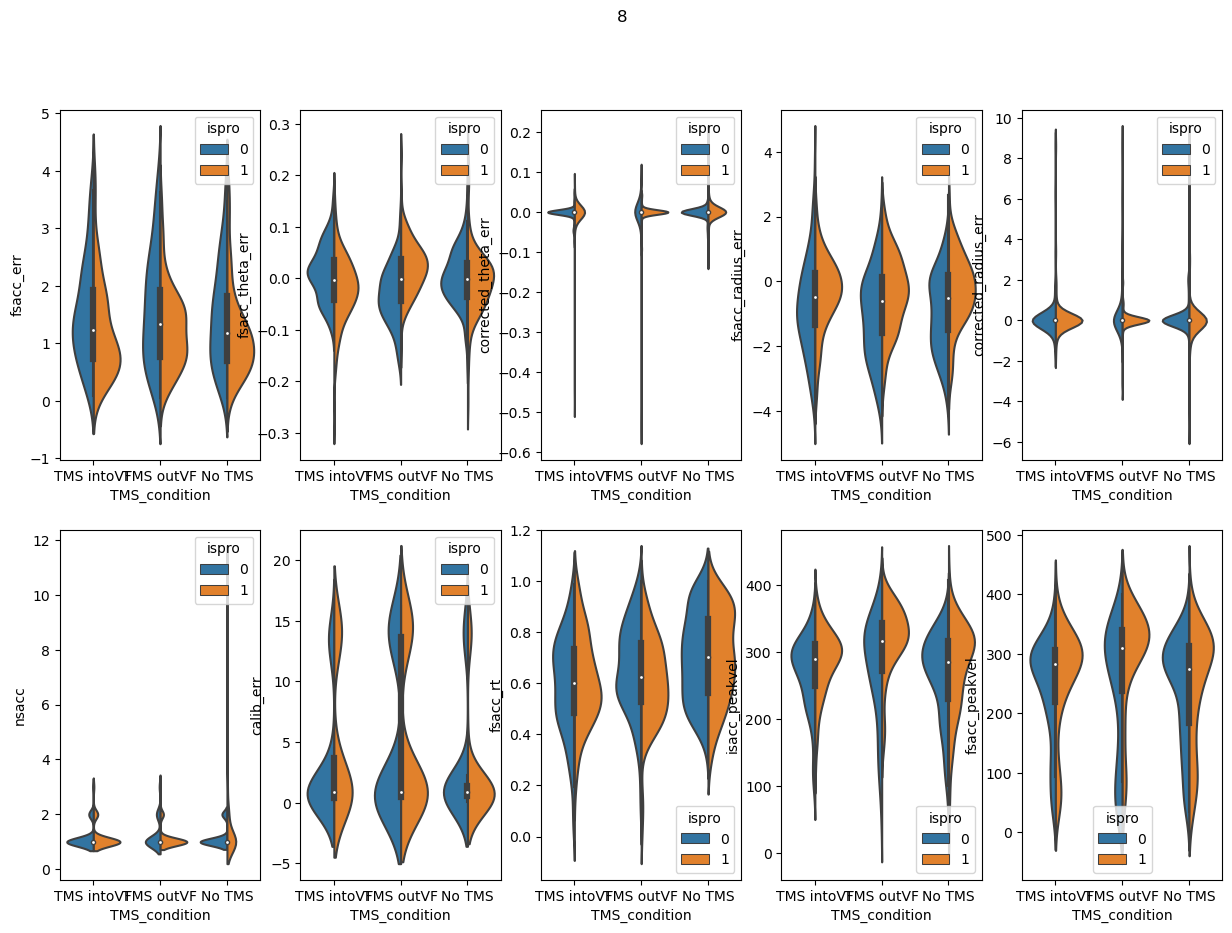

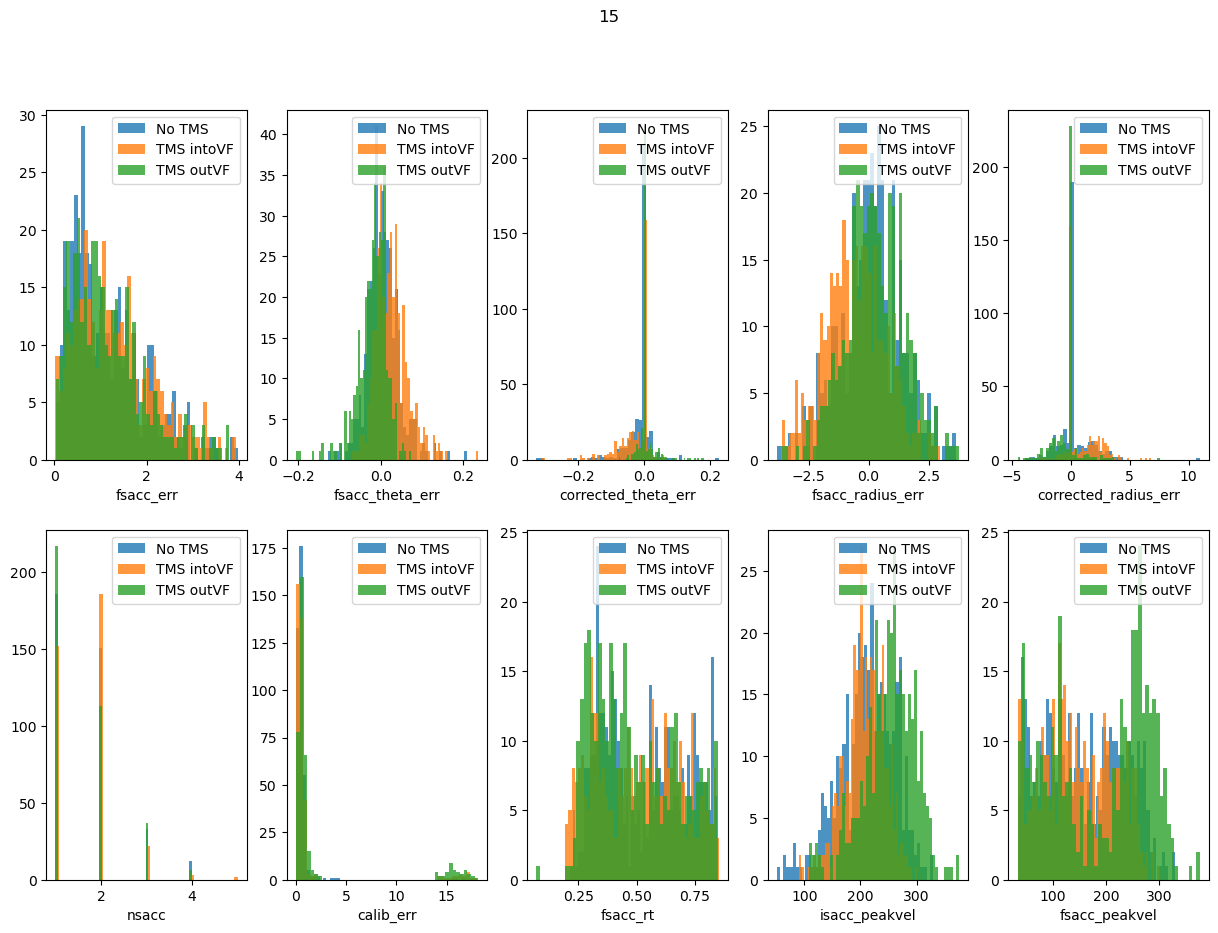

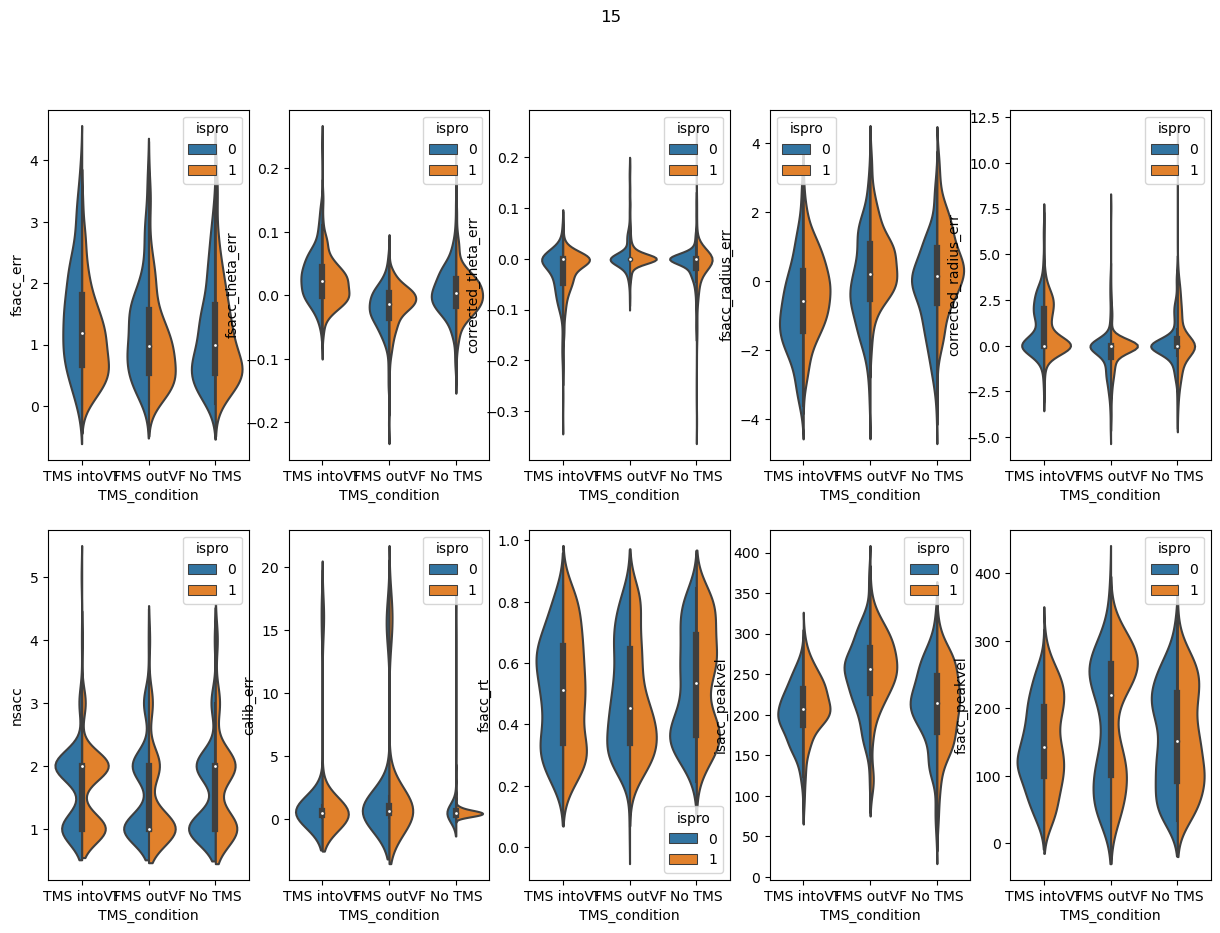

In [10]:
distribution_plots(df_filtered)